In [1]:
!wget "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-complete.csv" --output-document "prices.csv"

--2020-05-17 14:59:06--  http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-complete.csv
Resolving prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com (prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com)... 52.218.37.164
Connecting to prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com (prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com)|52.218.37.164|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://prod2.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-complete.csv [following]
--2020-05-17 14:59:06--  http://prod2.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-complete.csv
Resolving prod2.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com (prod2.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com)... 52.218.96.100
Connecting to prod2.publicdata.landregistry.gov.

In [0]:
!pip install python-Levenshtein

In [0]:
import Levenshtein
import os 

keywords = ["chimney","chy","chy."]

def isChimney(word):
  scores = list(map(lambda x: Levenshtein.ratio(word,x),keywords))
  return any(x > 0.67 for x in scores)

def findChimneysForCity(city):
  coords = []
  names = list(filter(lambda x: city in x,os.listdir('./res')))
  for file in names:
    with open('./res/'+file,'r') as f:
      lines = f.readlines()
      for line in lines:
        line = line.split(",")
        if isChimney(line[-3]):
          coords.append( (float(line[0]) , float(line[1]) , line[-3], line[-1]) )
  return coords

In [0]:
!unzip AllWithPostcode.zip

In [0]:
import re
pattern = re.compile(r'[A-Z]{1,2}[0-9R][0-9A-Z]? [0-9][A-Z]{2}')

def isValidPostcode(x):
  if isinstance(x, str): return bool(pattern.match(x))
  return False

def isValidPrice(x):
  if not isinstance(x, int): return False
  return x > 10000 and x < 3000000

In [192]:
pricingDataForeverssss = pricingDataForeverssss[pricingDataForeverssss.apply(lambda x: isValidPrice(x['Price']),axis=1)]
len(pricingDataForeverssss)

25106884

In [0]:
import pandas as pd
import requests 
import pickle 

pricingDataForever = pd.read_csv("prices.csv",header=None,usecols=[1,2,3], names=['Price','DateTime','PostCode'])
pricingDataForever.head()
pricingDataForever['Dates'] = pd.to_datetime(pricingDataForever['DateTime']).dt.date
pricingDataForever['Time'] = pd.to_datetime(pricingDataForever['DateTime']).dt.time
pricingDataForever = pricingDataForever.dropna(subset=['PostCode'])
pricingDataForever = pricingDataForever[pricingDataForever.apply(lambda x: isValidPostcode(x['PostCode']),axis=1)]
failedPostcode = pricingDataForever[pricingDataForever.apply(lambda x: not isValidPostcode(x['PostCode']),axis=1)]

## There were no string types
## len(test[test.apply(lambda x: testf(x['Price']),axis=1)])
pricingDataForever = pricingDataForever.dropna(subset=['Price'])
pricingDataForever = pricingDataForever[pricingDataForever.apply(lambda x: isValidPrice(x['Price']),axis=1)]

In [190]:
len(failedPostcode)

0

In [51]:
specificPricingData = pricingDataForever[pricingDataForever.apply(lambda x: x['PostCode'].strip().startswith('M',0,1) and x['PostCode'][1].isnumeric(), axis=1)]
specificPricingDataRecent = specificPricingData[specificPricingData.apply(lambda x: x['Dates'].year > 2010,axis=1)]

with open('allPostcodesToLatLon','rb') as f:
  postcodeToLatLon = pickle.load(f)

specificPricingDataRecent['LatLon'] = specificPricingDataRecent.apply(lambda x: postcodeToLatLon[x['PostCode'].strip()],axis=1)
specificPricingDataRecent = specificPricingDataRecent[specificPricingDataRecent['LatLon']!=(0,0)]
specificPricingDataRecent['Lat'] = specificPricingDataRecent.apply(lambda x: '%.3f'%postcodeToLatLon[x['PostCode'].strip()][0],axis=1)
specificPricingDataRecent['Lon'] = specificPricingDataRecent.apply(lambda x: '%.3f'%postcodeToLatLon[x['PostCode'].strip()][1],axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
from collections import defaultdict

mappingDict = defaultdict(list)

def truncatedPostcode(pcode):
  first,second = pcode.split(" ")
  return first+" "+second[0]

for index, row in specificPricingDataRecent.iterrows():
  mappingDict[truncatedPostcode(row['PostCode'])].append(row['Price'])

# mappingDict
coords = findChimneysForCity("Manchester")
byPostcode = defaultdict(list)

for lt,ln,word,pcode in coords:
  byPostcode[truncatedPostcode(pcode.strip("\n"))].append((lt,ln))

plotting = []
for key in mappingDict:
  numChimneys = 0
  if key in byPostcode:
    numChimneys = len(byPostcode[key])
  plotting.append([sum(mappingDict[key]) / len(mappingDict[key]), numChimneys])


In [240]:
-1*np.exp(new_x)

array([-1.17553382, -1.2343189 , -1.18220419, -1.16562521, -1.25766937,
       -1.24063159, -1.24549292, -1.25282002, -1.16939433, -1.24429198,
       -1.13934671, -1.20154351, -1.20826236, -1.18129113, -1.15030749,
       -1.17176219, -1.15726776, -1.0901905 , -1.19112664, -1.12330669,
       -1.21703149, -1.09566935, -1.14918   , -1.17947289, -1.21751571,
       -1.1175631 , -1.1113873 , -1.10094092, -1.10648837, -1.1401221 ,
       -1.15055757, -1.29898961, -1.11014403, -1.62198241, -1.20484213,
       -1.10919363, -1.12586382, -1.22066755, -1.17429536, -1.22769222,
       -1.17936484, -1.27078524, -1.17969523, -1.34616081, -1.83010948,
       -1.16174336, -1.29671118, -1.40617954, -1.11537452, -1.15513296,
       -1.09034317, -1.23102253, -1.29328235, -5.6136661 , -1.67043377,
       -4.00122274, -3.0455048 , -1.17351087])

LinAlgError: ignored

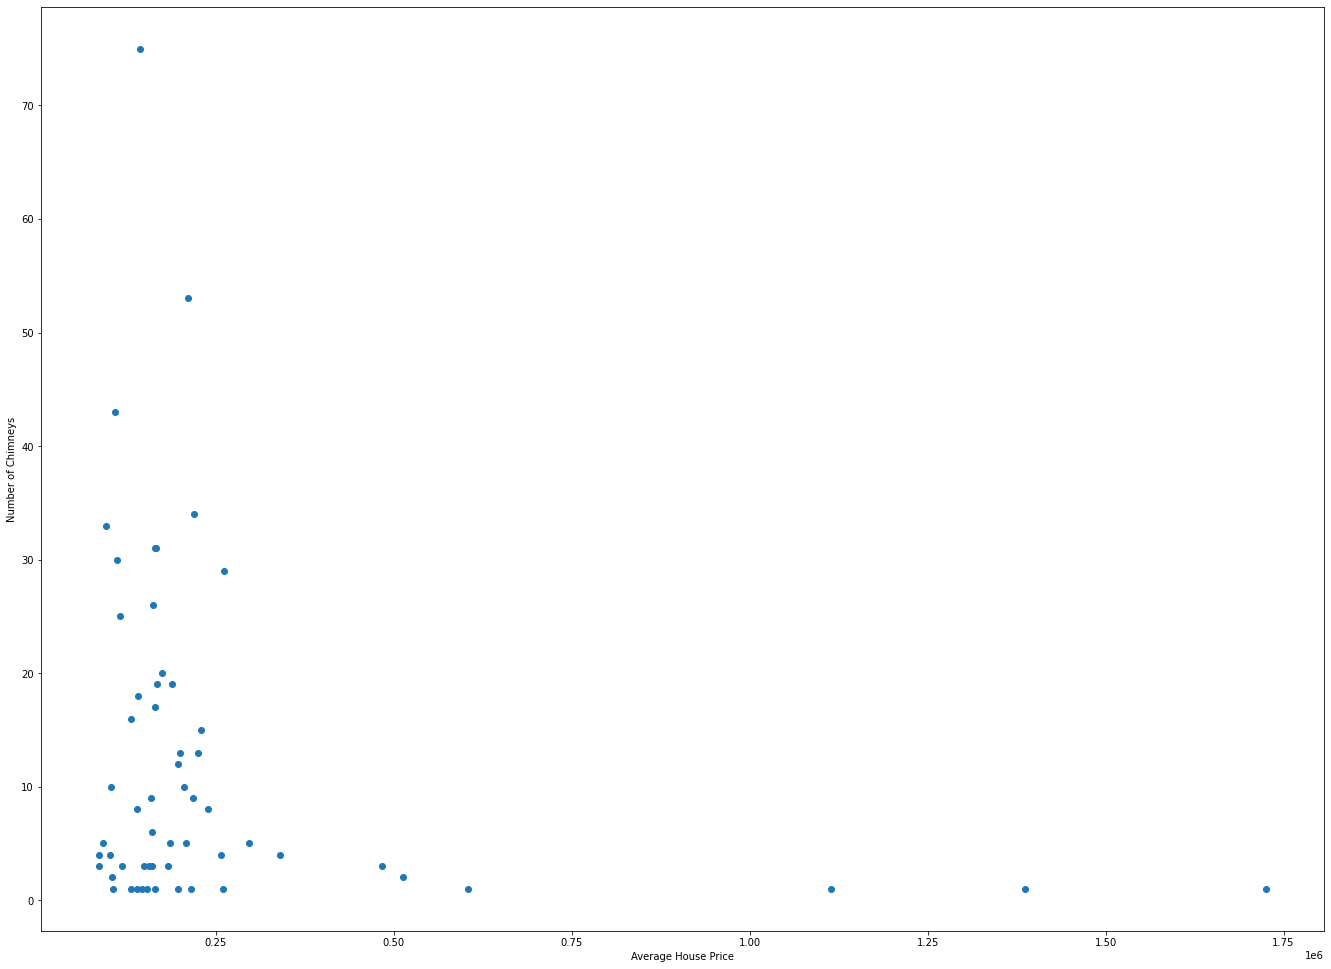

In [251]:
# plotting = list(filter(lambda x: x[1] != 0,plotting))
prices = np.array([x[0] for x in plotting]) 
numChimneys = np.array([x[1] for x in plotting]) 

plt.scatter(prices,numChimneys)
plt.ylabel('Number of Chimneys')
plt.xlabel('Average House Price')

new_x = prices
new_y = numChimneys
X = np.column_stack((np.ones(new_x.shape), np.array(list(map(lambda x: 1.01**(-1*x),new_x))) ))
A = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(new_y)
new_xs = np.linspace(0, 2000000, 100)
new_y_hat = A[0] + A[1] * np.array(list(map(lambda x: 1.01**(-1*x),new_xs)))
plt.plot(new_xs, new_y_hat, c='r')
plt.scatter(new_x, new_y)

plt.show()

In [61]:
from collections import Counter

Counter([x[1] for x in plotting])

Counter({0: 22022, 1: 175, 2: 34, 3: 8, 4: 3, 5: 1})

In [160]:
from collections import defaultdict
mappingDict = defaultdict(list)
import math 

for index, row in specificPricingDataRecent.iterrows():
  mappingDict[(row['Lat'],row['Lon'])].append(row['Price'])

for key in mappingDict:
  mappingDict[key] = sum(mappingDict[key]) / len(mappingDict[key])

print(len(set(specificPricingDataRecent['LatLon'])))
print(len(mappingDict))
temp = pd.DataFrame(mappingDict.items())
temp.columns = ['LatLon','Price']
temp['Lat'] = temp.apply(lambda x: x['LatLon'][0],axis=1)
temp['Lon'] = temp.apply(lambda x: x['LatLon'][1],axis=1)
temp['Logs'] = temp.apply(lambda x: math.log(x['Price']),axis=1)
len(temp)


22081
15552


15552

In [159]:
temp

1.6094379124341003

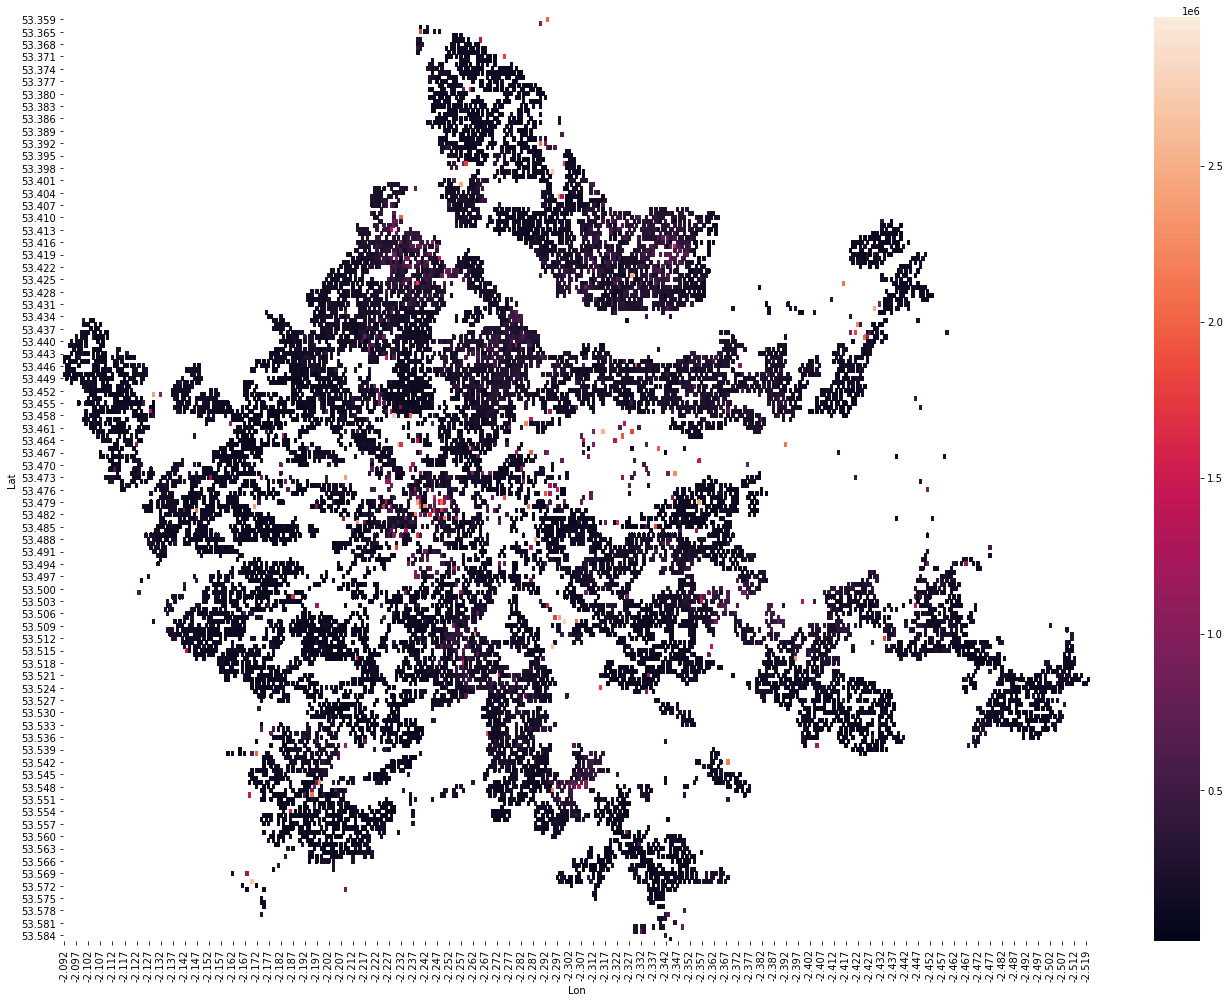

In [181]:
import matplotlib
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = [23, 17]
flights = temp.pivot("Lat", "Lon", "Price")
ax = sns.heatmap(flights)

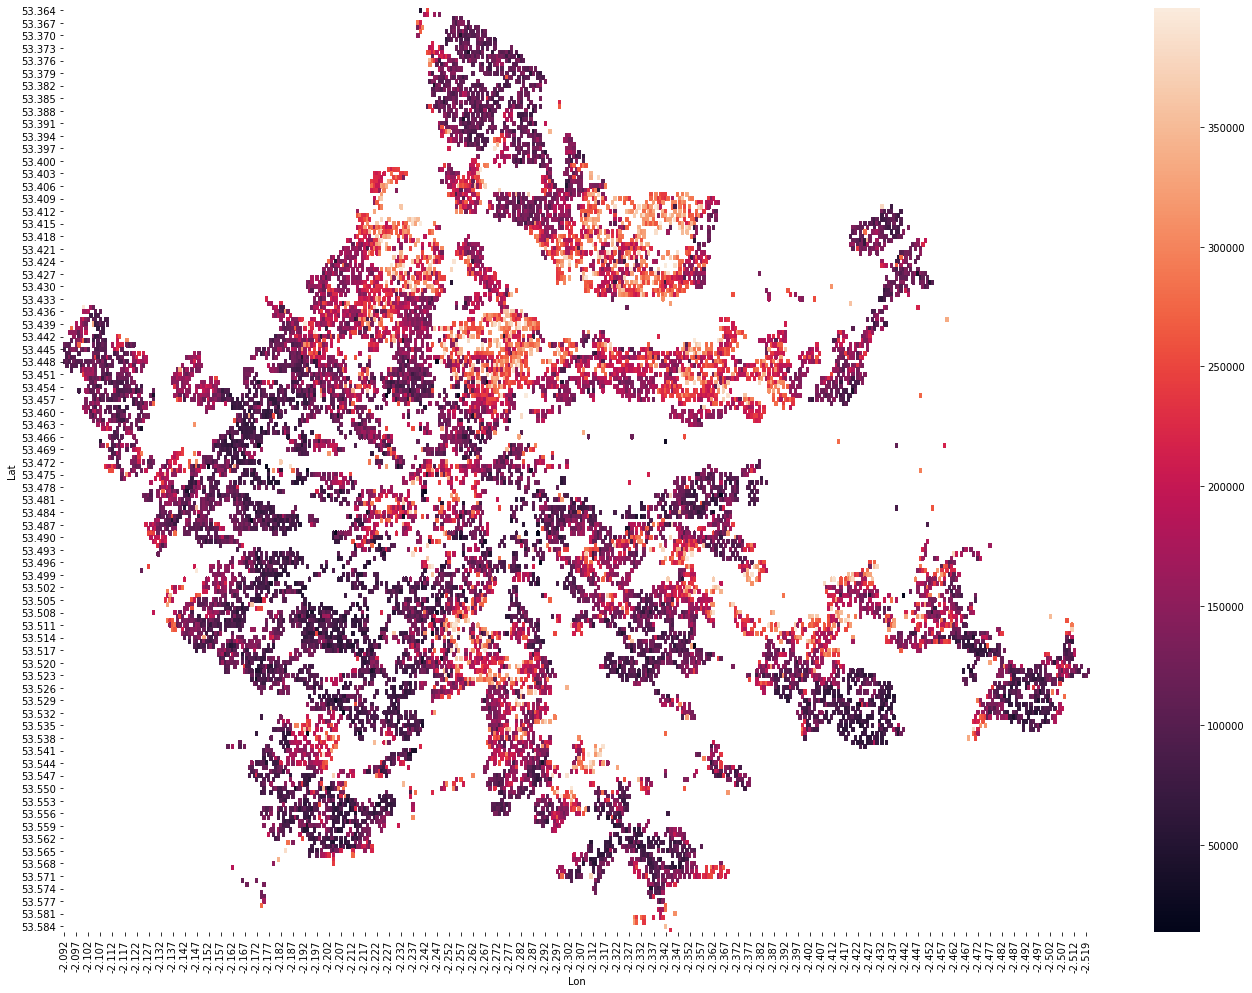

In [208]:
temp = temp[temp['Price']<400000]
flights = temp.pivot("Lat", "Lon", "Price")
ax = sns.heatmap(flights)

(221.0, 0.0) (0.0, 427.0)


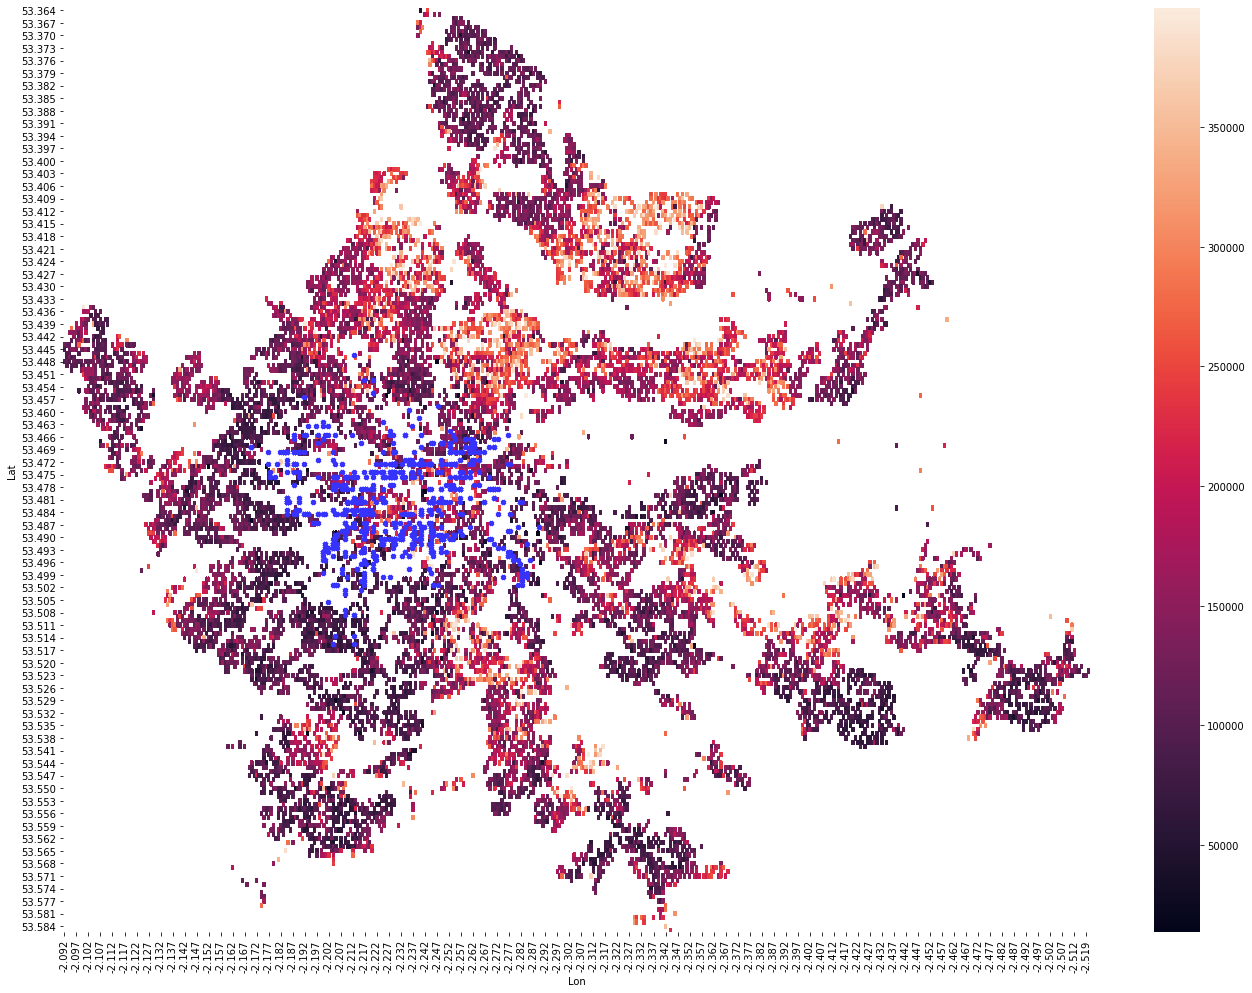

In [209]:
import pickle 
import matplotlib.pyplot as plt 

coords = findChimneysForCity("Manchester")
chimneys = list(map(lambda x: [x[0],x[1]],coords))
chimneys = list(map(lambda x: list(map(lambda y: float('%.3f'%y),x)),chimneys))
fig, ax = plt.subplots(1,1)
ax = sns.heatmap(flights)
minLat = min(list(map(lambda x: float(x),temp['Lat'].values.tolist())))
maxLon = max(list(map(lambda x: float(x),temp['Lon'].values.tolist())))
print(ax.get_ylim(),ax.get_xlim())
for lat, lon in chimneys:
  diffLat = int((lat - minLat)*1000)
  diffLon = int((maxLon - lon)*1000)
  ax.scatter(diffLon,diffLat, s=15, marker='x',c='#3633FF',linewidth=3)

In [120]:
len(temp)

15552

In [138]:
prices = specificPricingDataRecent["Price"].values.tolist()
sum(prices) / len(prices)

175053.8866728832

In [123]:
len(set(specificPricingDataRecent['LatLon']))

22081

In [0]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

cs = specificPricingDataRecent['LatLon'].values.tolist()
lats = [x[0] for x in cs]
lons = [x[1] for x in cs]

X = [[lats[i],lons[i]] for i in range(0,len(lats))]
knn = NearestNeighbors(n_neighbors=21)
knn.fit(X)

coords = findChimneysForCity("Manchester")
chimneys = list(map(lambda x: [x[0],x[1]],coords))

res = knn.kneighbors(chimneys, return_distance=False)

In [134]:
avgs = list(map(lambda x: sum(x)/len(x) ,res))
sum(avgs)/len(avgs)

86767.61797148226

Text(0.5, 0, 'Chimney ID')

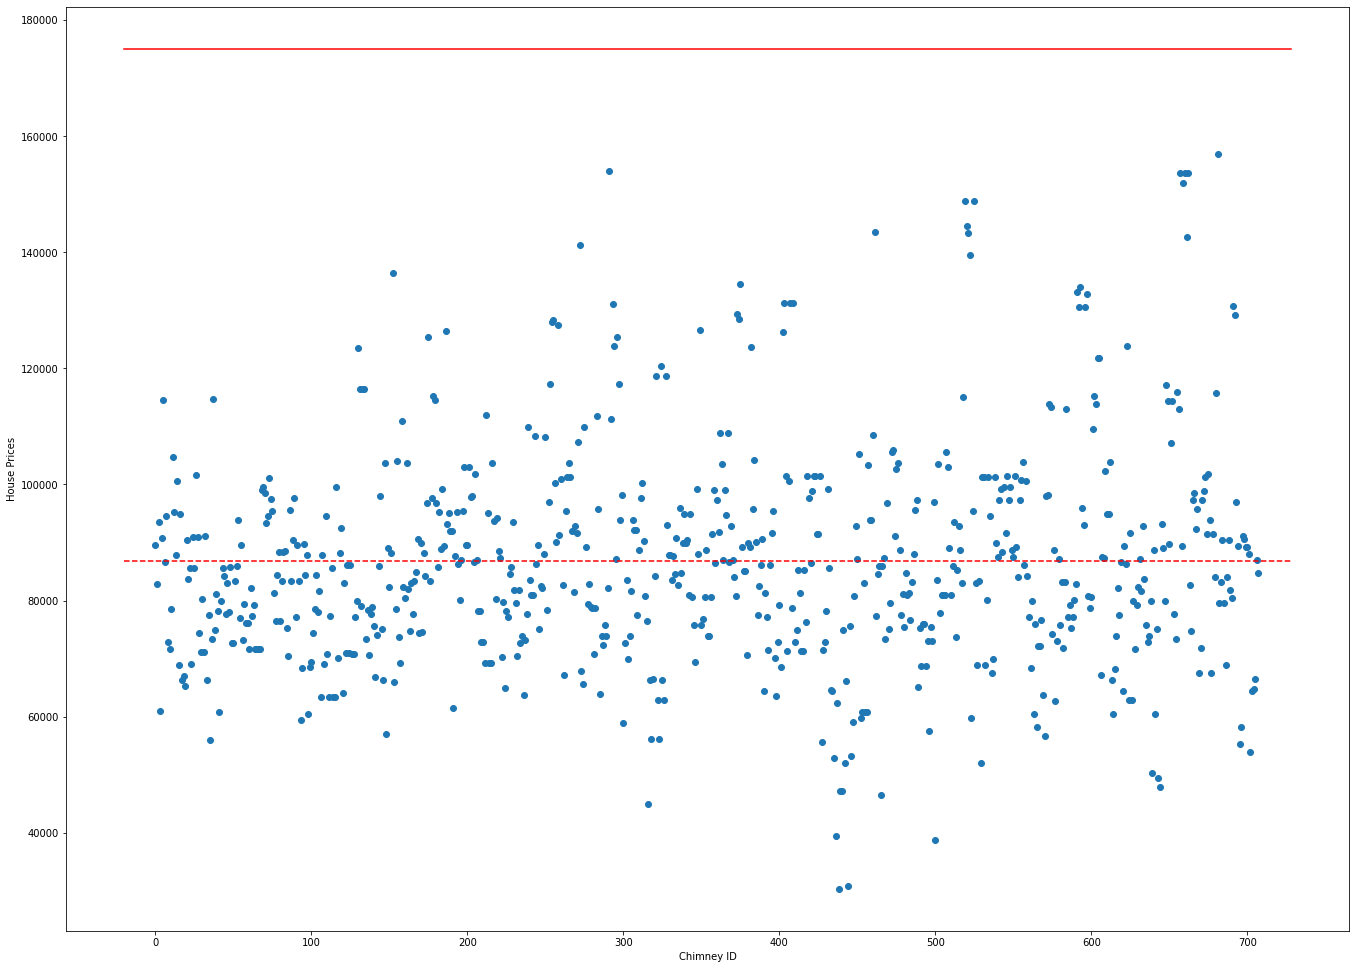

In [151]:
plt.scatter(range(len(avgs)),avgs)
plt.plot([-20,len(avgs)+20],[175053,175053],c='r')
plt.plot([-20,len(avgs)+20],[86767,86767],'--',c='r')
plt.ylabel('House Prices')
plt.xlabel('Chimney ID')

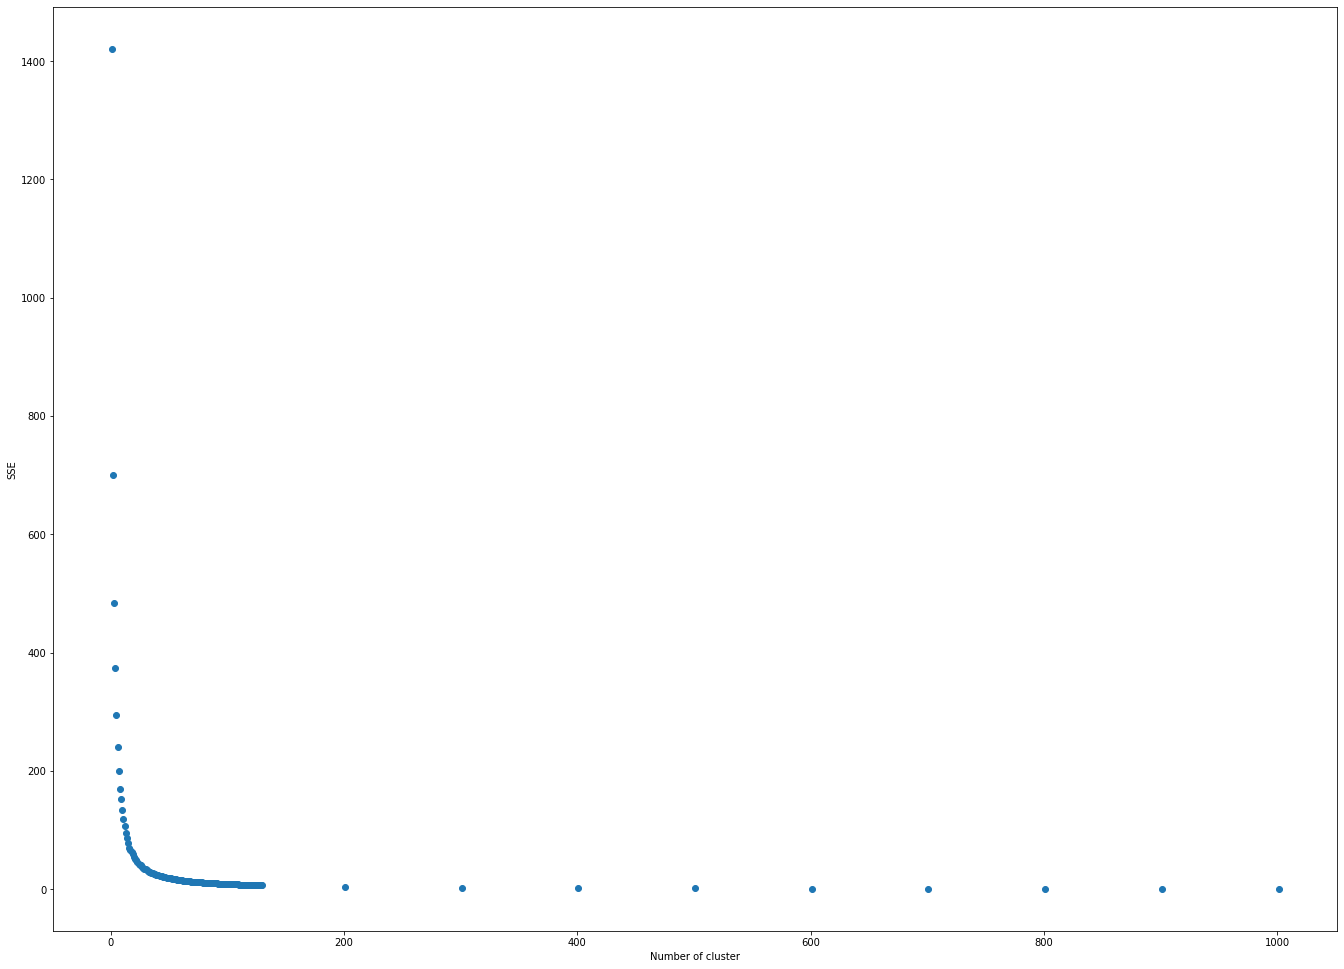

In [198]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
cs = specificPricingDataRecent['LatLon'].values.tolist()
lats = [x[0] for x in cs]
lons = [x[1] for x in cs]

data = [[lats[i],lons[i]] for i in range(0,len(lats))]

# # sse = {}
# for k in range(2, 100):
#     kmeans = KMeans(n_clusters=k, max_iter=5).fit(data)
#     # data["clusters"] = kmeans.labels_
#     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
#     print(str(k))
plt.figure()
plt.scatter(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [199]:
sse

{1: 1420.902341233079,
 2: 699.3291791639236,
 3: 483.8938805110796,
 4: 374.29981008263013,
 5: 294.16551731445537,
 6: 240.94126807980032,
 7: 200.28188132251847,
 8: 170.0148394114777,
 9: 151.8933594465605,
 10: 134.15503720463693,
 11: 118.61111112252522,
 12: 106.01440206815201,
 13: 94.37987123441357,
 14: 86.38675544703375,
 15: 78.4371837384503,
 16: 69.95807385516498,
 17: 66.47469425850126,
 18: 62.84743612739764,
 19: 59.243798930725916,
 20: 53.53181370045408,
 21: 51.364302196512256,
 22: 48.499808956513625,
 23: 46.078155276274856,
 24: 43.13721987437138,
 25: 41.63135548849538,
 26: 40.46780499394933,
 27: 37.737170030249565,
 28: 35.79152095143108,
 29: 34.50825431671546,
 30: 33.25867291466873,
 31: 32.35700856345641,
 32: 30.907028688709648,
 33: 29.66751823328155,
 34: 29.12078387663286,
 35: 27.94796383782484,
 36: 27.441738787380878,
 37: 26.1511514344699,
 38: 25.329219923982382,
 39: 24.270535609816534,
 40: 23.729208145439433,
 41: 23.57088867530289,
 42: 22.67

In [0]:
cs = specificPricingDataRecent['LatLon'].values.tolist()
lats = [x[0] for x in cs]
lons = [x[1] for x in cs]

data = [[lats[i],lons[i]] for i in range(0,len(lats))]

kmeans = KMeans(n_clusters=80, max_iter=5).fit(data)
coords = findChimneysForCity("Manchester")
chimneys = list(map(lambda x: [x[0],x[1]],coords))

In [0]:
chimneyClusters = kmeans.predict(chimneys)
chimneyCounts = Counter(chimneyClusters)

In [265]:
averageHousePricePerCluster = defaultdict(list)

vals = specificPricingDataRecent['Price'].values.tolist()
labs = kmeans.labels_
for i in range(len(vals)):
  averageHousePricePerCluster[labs[i]].append(vals[i])

proceed = {}

for item in averageHousePricePerCluster:
  proceed[item] = (chimneyCounts[item], sum(averageHousePricePerCluster[item])/len(averageHousePricePerCluster[item]))

proceed


{0: (0, 285614.152252907),
 1: (0, 144481.7604895105),
 2: (22, 93988.59059534081),
 3: (0, 139452.10011376566),
 4: (0, 148336.21989906274),
 5: (26, 115100.10055478502),
 6: (0, 127676.09033168666),
 7: (0, 198301.32756632066),
 8: (66, 219106.52917946468),
 9: (0, 344051.17647058825),
 10: (0, 185633.01812865498),
 11: (1, 142010.81184056273),
 12: (0, 222983.76798825257),
 13: (0, 134276.25069328895),
 14: (0, 175927.01530612246),
 15: (0, 119035.67165242165),
 16: (66, 194756.8412128466),
 17: (0, 268382.17741935485),
 18: (0, 161880.0126660488),
 19: (0, 119112.9900471451),
 20: (0, 278594.64003849856),
 21: (0, 132277.77598642342),
 22: (0, 128976.77346534653),
 23: (0, 134348.91235710398),
 24: (0, 188764.61562338335),
 25: (0, 167919.7562208398),
 26: (0, 225457.207896052),
 27: (1, 139469.5030885381),
 28: (0, 154217.37252124646),
 29: (0, 206222.0114226376),
 30: (7, 160337.72789738892),
 31: (82, 198615.01944635095),
 32: (7, 106566.60562708632),
 33: (0, 139561.9551092735)

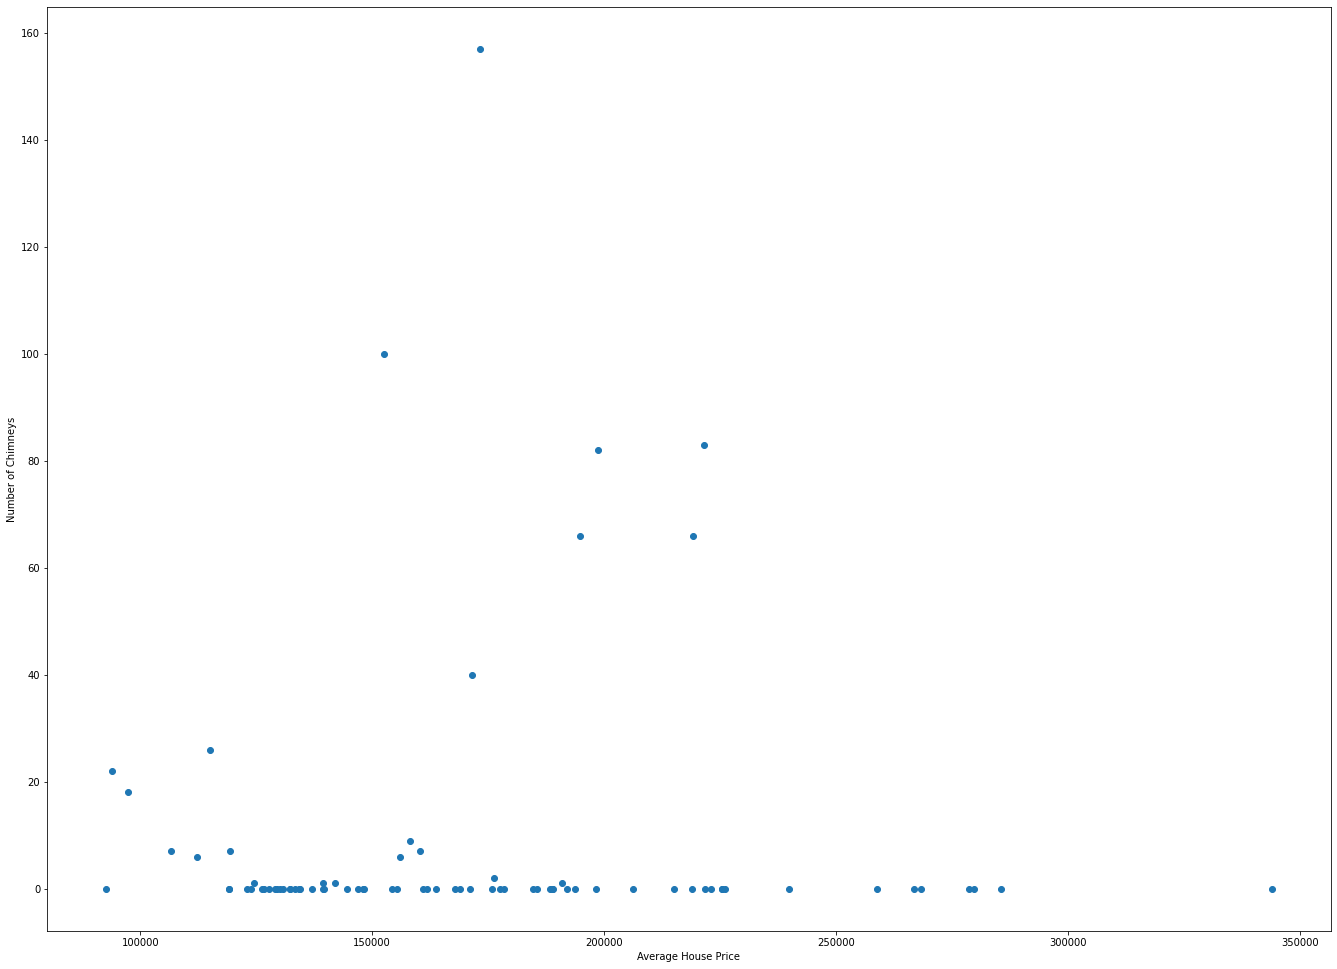

In [267]:
# plotting = list(filter(lambda x: x[1] != 0,plotting))
prices = np.array([x[1] for x in proceed.values()]) 
numChimneys = np.array([x[0] for x in proceed.values()]) 

plt.scatter(prices,numChimneys)
plt.ylabel('Number of Chimneys')
plt.xlabel('Average House Price')

plt.show()

In [269]:
x = Counter(labs).values()
sum(x) / len(x)

2037.575